The magnetic field is parallel with xyz. There seems to be an error in the original .rac file. The right and left operators are inverted.

Expectation values for the initial Hamiltonian:

|  Program  | 〈*H*〉 | 〈*Sk*〉 | 〈*Lk*〉 |
| --- | --- | --- | --- |
|Quanty | -6.874724 | -0.292475 | -0.806839 |
|TTMult | -6.87472  | -0.292471 | -0.806839 |


Expectation values for the final Hamiltonian:

|  Program  | 〈*H*〉 | 〈*Sk*〉 | 〈*Lk*〉 |
| --- | --- | --- | --- |
|Quanty | -7.180146 | -0.021472 | -0.388239 |
|TTMult | N/A | N/A | N/A

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import sys
import math

sys.path.insert(0, '../../utils')
from read_spectrum import read_ttmult_spectrum, read_quanty_spectrum

In [3]:
SHIFT = 715.43  # 715.4570

# Spectra

<IPython.core.display.Javascript object>


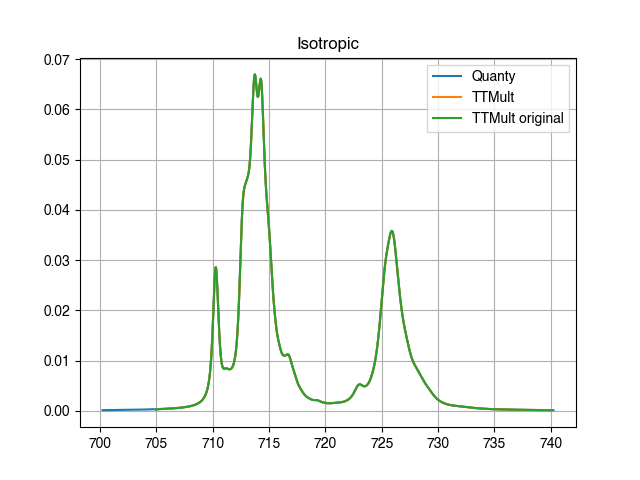

In [4]:
fig, ax = plt.subplots()
ax.grid()

x, y = read_quanty_spectrum('Quanty/input_iso.spec')
ax.plot(x + SHIFT, y, label='Quanty')
xiso_quanty = x
yiso_quanty = y

x, y, xsticks, ysticks = read_ttmult_spectrum('TTMult/input-3iso2K.xy')
# The isotropic spectrum from TTMult must be devided by 3.
y = y / 3
ax.plot(x, y, label='TTMult')
xiso_ttmult = x
yiso_ttmult = y

x, y, xsticks, ysticks = read_ttmult_spectrum('TTMult/original/fe-OhC3v-Bxyz-3iso2K.xy')
y = y / 3
ax.plot(x, y, label='TTMult original')

plt.title('Isotropic')
ax.legend()

<IPython.core.display.Javascript object>


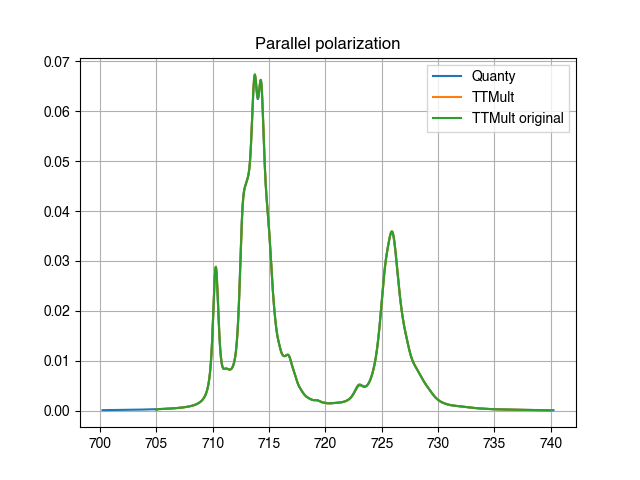

In [5]:
fig, ax = plt.subplots()
ax.grid()

x, y = read_quanty_spectrum('Quanty/input_k.spec')
ax.plot(x + SHIFT, y, label='Quanty')

x, y, xsticks, ysticks = read_ttmult_spectrum('TTMult/input-parallel2K.xy')
ax.plot(x, y, label='TTMult')

x, y, xsticks, ysticks = read_ttmult_spectrum('TTMult/original/fe-OhC3v-Bxyz-parallel2K.xy')
ax.plot(x, y, label='TTMult original')

plt.title('Parallel polarization')
ax.legend()

<IPython.core.display.Javascript object>


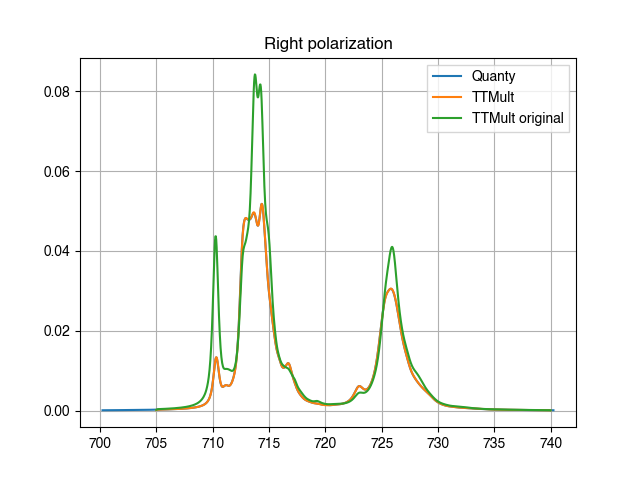

In [6]:
fig, ax = plt.subplots()
ax.grid()

x, y = read_quanty_spectrum('Quanty/input_r.spec')
ax.plot(x + SHIFT, y, label='Quanty')

x, y, xsticks, ysticks = read_ttmult_spectrum('TTMult/input-right2K.xy')
ax.plot(x, y, label='TTMult')

x, y, xsticks, ysticks = read_ttmult_spectrum('TTMult/original/fe-OhC3v-Bxyz-right2K.xy')
ax.plot(x, y, label='TTMult original')

plt.title('Right polarization')
ax.legend()

<IPython.core.display.Javascript object>


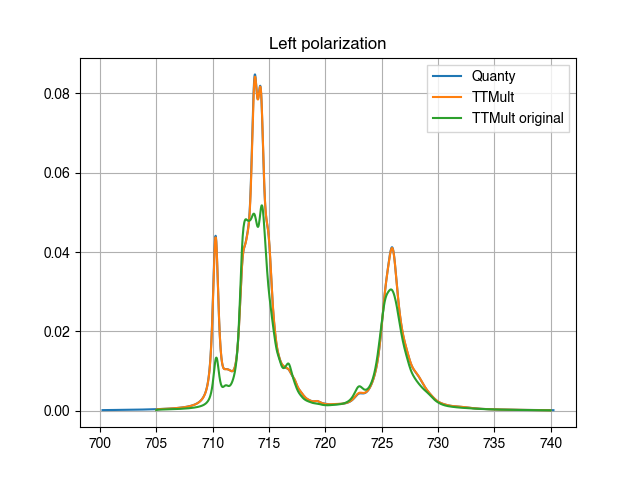

In [7]:
fig, ax = plt.subplots()
ax.grid()

x, y = read_quanty_spectrum('Quanty/input_l.spec')
ax.plot(x + SHIFT, y, label='Quanty')

x, y, xsticks, ysticks = read_ttmult_spectrum('TTMult/input-left2K.xy')
ax.plot(x, y, label='TTMult')

x, y, xsticks, ysticks = read_ttmult_spectrum('TTMult/original/fe-OhC3v-Bxyz-left2K.xy')
ax.plot(x, y, label='TTMult original')

plt.title('Left polarization')
ax.legend()

<IPython.core.display.Javascript object>


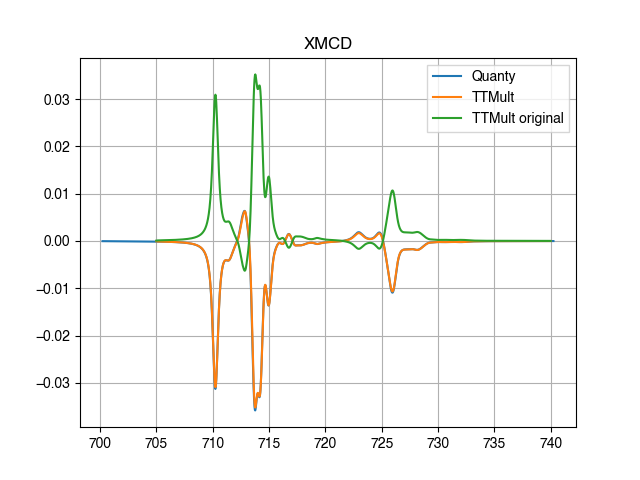

In [8]:
fig, ax = plt.subplots()
ax.grid()

x, y = read_quanty_spectrum('Quanty/input_cd.spec')
ax.plot(x + SHIFT, y, label='Quanty')
xcd_quanty = x
ycd_quanty = y

x, y, xsticks, ysticks = read_ttmult_spectrum('TTMult/input-xmcd2K.xy')
ax.plot(x, y, label='TTMult')
xcd_ttmult = x
ycd_ttmult = y

x, y, xsticks, ysticks = read_ttmult_spectrum('TTMult/original/fe-OhC3v-Bxyz-xmcd2K.xy')
ax.plot(x, y, label='TTMult original')

plt.title('XMCD')
ax.legend()

# Sum rules

3$\int_{Iso} = \frac{4l + 2 - n_d}{(2l + 1)}$ 

In [9]:
nd_calculation = 5
nd_sum_rule = 10 - 3 * 5 * np.trapz(yiso_quanty, xiso_quanty)

print('nd (calculation) = {:f}'.format(nd_calculation))
print('nd (sum rule)    = {:f}'.format(nd_sum_rule))

nd (calculation) = 5.000000
nd (sum rule)    = 5.059464


$\langle L_z \rangle = \frac{2}{3} \frac{\int_{XMCD}}{\int_{Iso}} (10 - n_d)$

In [14]:
Lz_calculation = -0.806839
Lz_sum_rule = 2. / 3. * np.trapz(ycd_ttmult, xcd_ttmult) / np.trapz(yiso_ttmult, xiso_ttmult) * (10 - nd_calculation)
Lz_sum_rule = np.trapz(ycd_ttmult, xcd_ttmult) / np.trapz(yiso_ttmult, xiso_ttmult) * 10. / 3.

print('Lz (calculation) = {:f}'.format(Lz_calculation))
print('Lz (sum rule)    = {:f}'.format(Lz_sum_rule))

Lz (calculation) = -0.806839
Lz (sum rule)    = -0.800690


In [13]:
Lz_calculation = -0.806839
Lz_sum_rule = 2. / 3. * np.trapz(ycd_quanty, xcd_quanty) / np.trapz(yiso_quanty, xiso_quanty) * (10 - nd_calculation)

print('Lz (calculation) = {:f}'.format(Lz_calculation))
print('Lz (sum rule)    = {:f}'.format(Lz_sum_rule))

Lz (calculation) = -0.806839
Lz (sum rule)    = -0.805151
